Depedencies installation

In [1]:
%pip install pymupdf
%pip install KeyBERT
%pip install yake

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



Import Libraries

In [2]:
# Import widget
from IPython.display import Image as IPImage, display, HTML
from ipywidgets import interact, Select, SelectMultiple, HBox, VBox, interactive_output, widgets, Layout
import warnings

# Other
import glob, os, sys, re

# Local
import util

In [8]:
text_path = "../output/"
opt = ['text', 'metadata']

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

In [10]:
def read_file(pdf_file, opt):
    global data_txt, content_txt, md_txt
    
    txt_path = text_path + "text/" + pdf_file
    md_path = text_path + "metadata/" + pdf_file
    
    content_txt = read_text_file(txt_path)
    md_txt = read_text_file(md_path)

    if (opt == "text"):
        data_text = content_txt
    else:
        data_text = md_txt
    display(widgets.HTML(data_text[:1500], raw=True))

pdf_list = [os.path.basename(file) for file in glob.iglob( text_path +'/text/*') if re.search(".+\.(txt)", os.path.basename(file))]

w1 = widgets.Select(options=pdf_list, value=pdf_list[0],rows=3, description='PDF File',disabled=False, layout=Layout(width='25%'))
w3 = widgets.Select(options=opt, value=opt[0],rows=3, description='Options',disabled=False, layout=Layout(width='15%'))
ui = HBox([w1, w3])
w_dict = {'pdf_file': w1, 'opt': w3}
out = interactive_output(read_file, w_dict)
display(ui, out)

Output()

Abstract Identifier

In [11]:
abs = util.abstract_extraction(content_txt)
abs

'— this paper describes the development of a novel non-anthropomorphic robot hand with the ability to manipulate objects by means of articulated, actively driven rollers located at the ﬁngertips. an analysis is conducted and systems of equations for two-ﬁnger and three-ﬁnger manipulation of a sphere are formulated to demonstrate full six degree of freedom nonholonomic spatial motion capability. a prototype version of the hand was constructed and used to grasp and manipulate a variety of objects. tests conducted with the prototype conﬁrmed the validity of the mathematical analysis. unlike conventional approaches to within-hand manipulation using legacy robotic hands, the continuous rotation capability of our rolling ﬁngertips allows for unbounded rotation of a grasped object without the need for ﬁnger gaiting. i. '

Metadata Extraction

In [12]:
md = util.metadata_extraction(md_txt)
title = md["title"]
title

'Design of a Roller-Based Dexterous Hand for Object Grasping and Within-Hand Manipulation'

Keyword Extraction

In [13]:
kw_all = util.keywords_extraction(content_txt)
kw_all

[('robotic hands', 0.6193),
 ('roller grasper', 0.5999),
 ('spherical object manipulation', 0.507),
 ('manipulation tasks', 0.4701),
 ('kinematics', 0.4343)]

In [14]:
kw_abs = util.keywords_extraction(abs)
kw_abs

[('robotic hands', 0.6588),
 ('actively driven rollers', 0.4547),
 ('rotation capability', 0.4538),
 ('nonholonomic spatial motion', 0.4159),
 ('rolling ﬁngertips', 0.3944)]

Sentiment Analysis

In [16]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', top_k=None)
prediction = classifier(abs)
print(prediction)

[[{'label': 'joy', 'score': 0.8168344497680664}, {'label': 'fear', 'score': 0.10476111620664597}, {'label': 'anger', 'score': 0.05356966704130173}, {'label': 'surprise', 'score': 0.011461232788860798}, {'label': 'sadness', 'score': 0.011127215810120106}, {'label': 'love', 'score': 0.0022463654167950153}]]


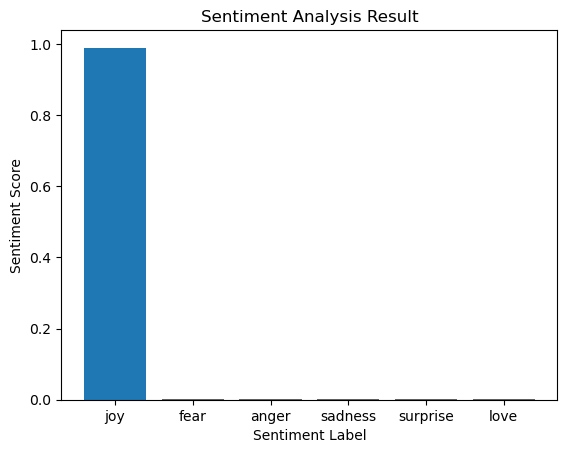

In [ ]:
import matplotlib.pyplot as plt

label = [i["label"] for i in prediction[0]]
score = [i["score"] for i in prediction[0]]

def plot_sentiment(label, score):
    # Create a bar plot of the sentiment score
    plt.bar(label, score)
    plt.xlabel('Sentiment Label')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis Result')
    plt.show()

plot_sentiment(label, score)

Crossref

In [ ]:
crossref = util.crossref_search(title)
crossref

{'indexed': {'date-parts': [[2023, 6, 7]],
  'date-time': '2023-06-07T16:12:30Z',
  'timestamp': 1686154350659},
 'reference-count': 36,
 'publisher': 'IEEE',
 'license': [{'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'vor',
   'delay-in-days': 0,
   'URL': 'https://ieeexplore.ieee.org/Xplorehelp/downloads/license-information/IEEE.html'},
  {'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'stm-asf',
   'delay-in-days': 0,
   'URL': 'https://doi.org/10.15223/policy-029'},
  {'start': {'date-parts': [[2020, 10, 24]],
    'date-time': '2020-10-24T00:00:00Z',
    'timestamp': 1603497600000},
   'content-version': 'stm-asf',
   'delay-in-days': 0,
   'URL': 'https://doi.org/10.15223/policy-037'}],
 'content-domain': {'domain': [], 'crossmark-restriction': False},
 'published-print': {'date-parts': [[2020, 10, 2

In [ ]:
for ref in crossref["reference"]:
    print(ref["key"], ref.get("DOI", ""), ref.get("journal-title", ""))

ref33 10.1109/70.88036
ref32 10.1109/ROBOT.2009.5152385
ref31 10.1016/j.robot.2004.03.002
ref30 10.15607/RSS.2020.XVI.082
ref36 10.1007/s10851-009-0161-2
ref35 
ref34 
ref10 10.1115/1.4044163
ref11 10.1109/IROS.2012.6385939
ref12 10.1115/DETC2016-60354
ref13 10.1109/ICRA.2016.7487156
ref14 10.1177/0278364919887447
ref15 10.15607/RSS.2018.XIV.058
ref16 10.1109/IROS.2018.8594303
ref17 10.1109/IROS.2017.8206014
ref18 10.1109/AIM.2016.7576796
ref19 10.1109/ICRA.2017.7989394
ref28 
ref4 
ref27 
ref3 10.1109/ICRA.2011.5979830
ref6 
ref29 
ref5 10.1109/ICRA.2011.5980371
ref8 10.1177/0278364917694723
ref7 10.1177/0278364909360852
ref2 10.1146/annurev-control-060117-105003
ref9 10.1109/TRO.2016.2562122
ref1 10.1109/ICRA40945.2020.9197146
ref20 
ref22 10.1109/ICRA.2014.6907062
ref21 10.1109/ROBOT.1988.12056
ref24 10.1109/IROS.2015.7354264
ref23 10.1109/TRO.2017.2693391
ref26 10.1109/HUMANOIDS.2015.7363524
ref25 10.1177/0278364914559753
